## Lab 6 - Informed Search Algorithms

#### What is informed search?

These algorithms have information on the <b>goal state</b> which helps in more efficient searching. 

This information is obtained by a function that estimates how close a state is to the goal state. Informed search in AI is a type of search algorithm that uses additional information to guide the search process, allowing for more efficient problem-solving compared to uninformed search algorithms.

Informed search algorithm uses the idea of heuristic, so it is also called Heuristic search.


### What is Heuristics function?

Heuristic is a function which is used in Informed Search, and it finds the most promising path. It takes the current state of the agent as its input and produces the estimation of how close agent is from the goal. The heuristic method, however, might not always give the best solution, but it guaranteed to find a good solution in reasonable time. Heuristic function estimates how close a state is to the goal.

It is represented by h(n), and it calculates the cost of an optimal path between the pair of states. The value of the heuristic function is always positive.

## 1. Best First Search
Greedy best-first search algorithm always selects the path which appears best at that moment. It is the combination of depth-first search and breadth-first search algorithms. It uses the heuristic function and search. Best-first search allows us to take the advantages of both algorithms. With the help of best-first search, at each step, we can choose the most promising node. In the best first search algorithm, we expand the node which is closest to the goal node and the closest cost is estimated by heuristic function, i.e. f(n)= g(n).   
Were, h(n)= estimated cost from node n to the goal.

The greedy best first algorithm is implemented by the priority queue.

#### Best first search algorithm:

<b>Step 1:</b> Place the starting node into the OPEN list.

<b>Step 2:</b> If the OPEN list is empty, Stop and return failure.

<b>Step 3:</b> Remove the node n, from the OPEN list which has the lowest value of h(n), and places it in the CLOSED list.

<b>Step 4:</b> Expand the node n, and generate the successors of node n.

<b>Step 5:</b> Check each successor of node n, and find whether any node is a goal node or not. If any successor node is goal node, then return success and terminate the search, else proceed to Step 6.

<b>Step 6:</b> For each successor node, algorithm checks for evaluation function f(n), and then check if the node has been in either OPEN or CLOSED list. If the node has not been in both list, then add it to the OPEN list.

<b>Step 7:</b> Return to Step 2.

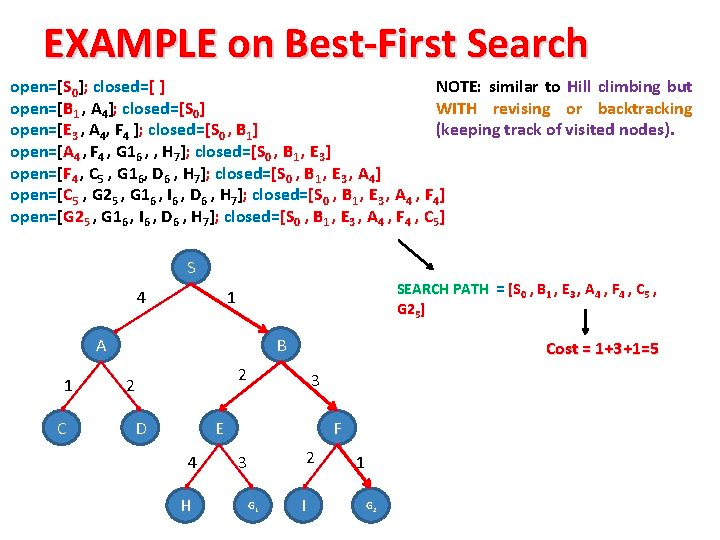

## 2. A* Search Algorithm

A* search is the most commonly known form of best-first search. 

It uses heuristic function h(n), and cost to reach the node n from the start state g(n). It has combined features of UCS and greedy best-first search, by which it solve the problem efficiently. A* search algorithm finds the shortest path through the search space using the heuristic function. This search algorithm expands less search tree and provides optimal result faster.

A* algorithm is similar to UCS except that it uses g(n)+h(n) instead of g(n).

#### Algorithm of A* search:

<b>Step1:</b> Place the starting node in the OPEN list.

<b>Step 2:</b> Check if the OPEN list is empty or not, if the list is empty then return failure and stops.

<b>Step 3:</b> Select the node from the OPEN list which has the smallest value of evaluation function (g+h), if node n is goal node then return success and stop, otherwise

<b>Step 4:</b> Expand node n and generate all of its successors, and put n into the closed list. For each successor n', check whether n' is already in the OPEN or CLOSED list, if not then compute evaluation function for n' and place into Open list.

<b>Step 5:</b> Else if node n' is already in OPEN and CLOSED, then it should be attached to the back pointer which reflects the lowest g(n') value.

<b>Step 6:</b> Return to Step 2.

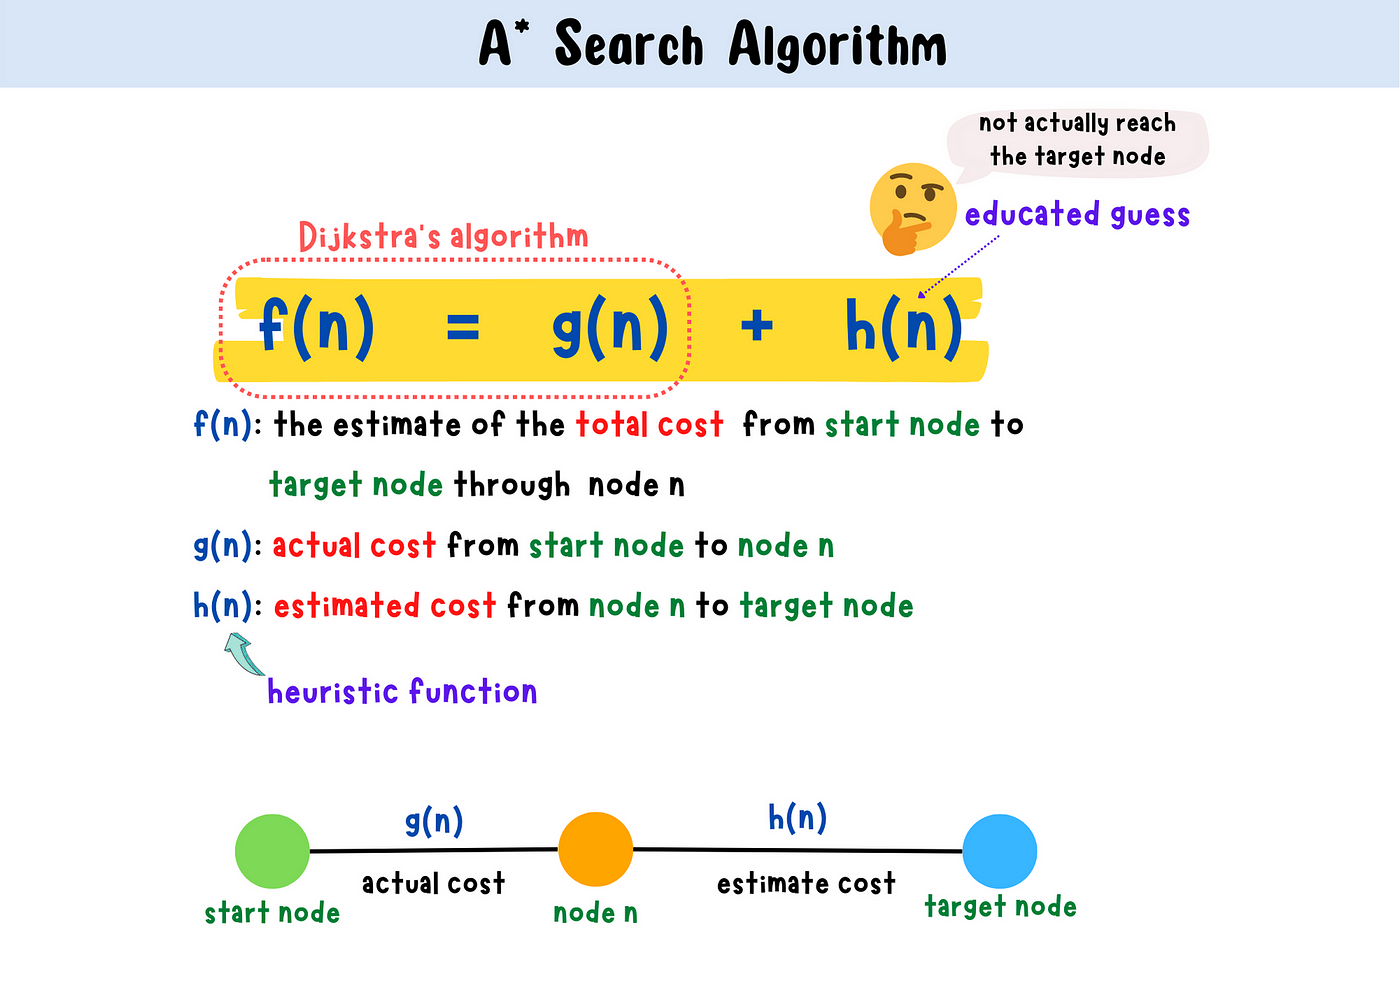

### Task 01: Find Optimal Path Using Best First Search

Suppose there are 7 locations in a city named as A, B, C ... G.

A is the starting point, and G is the destination.
There can be multiple paths from A to G.

You have to find and print the optimal path that can be taken from A to reach G using Best First Algorithm.
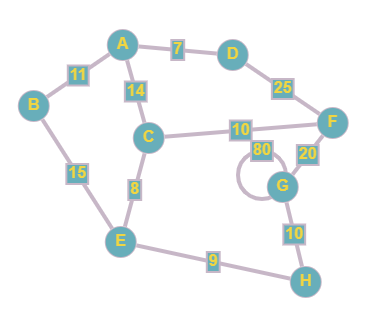

The value mentioned on the edges is the <b> cost </b>. And <b> cost </b> and <b> heuristic value </b> are two different things.

Suppose <b>Euclidean Distance</b> was used as <b>heuristic function</b> here,<br>
So the heuristic values are:

A -> G = 40 <br>
B -> G = 32 <br>
C -> G = 25 <br>
D -> G = 35 <br>
E -> G = 19 <br>
F -> G = 17 <br>
H -> G = 10 <br>
G -> G =  0 <br>

In [20]:

def bestfirstsearch(graph,hueristic_costs,start, end):
    #your code here
    visited = set()
    queue = [(hueristic_costs[start], start, [])]
    
    while queue:
        cost, node, path = queue.pop(0)
        if node == end:
            return path + [node]
        
        if node not in visited:
            visited.add(node)
            
        # print(historical_sites[node])
        for neighbor, edge_cost in graph[node].items():
            if neighbor not in visited:

                queue.append((hueristic_costs[neighbor], neighbor, path + [node]))
                    
            queue.sort(key=lambda x: x[0])
        print(" In BFS Function ")
    
    return None
    

    
    
    

In [21]:
# Example graph
# you have to make a graph according to the above scenario
hueristic_costs = {
    'A': 40,
    'B': 32,
    'C': 25,
    'D': 35,
    'E': 19,
    'F': 17,
    'G': 0,
    'H': 10
}

graph = {
    'A': {'B': 11, 'C': 14, 'D': 7},
    'B': {'A': 11, 'E': 15},
    'C': {'A': 14, 'E': 8, 'F': 10},
    'D': {'A': 7, 'F': 25},
    'E': {'B': 15, 'C': 8, 'H': 9},
    'F': {'C': 10, 'D': 25, 'G': 20},
    'G': {'F': 20, 'H': 10},
    'H': {'E': 9, 'G': 10}
}

# Starting and ending nodes
start_node = 'A'
end_node = 'G'

# Perform BFS and print the path from start to end
path = bestfirstsearch(graph, hueristic_costs, start_node, end_node)
if path:
    print("Path from", start_node, "to", end_node, ":", path)
else:
    print("No path found from", start_node, "to", end_node)

 In BFS Function 
 In BFS Function 
 In BFS Function 
Path from A to G : ['A', 'C', 'F', 'G']


### Task 01: Find Optimal Path Using A* Search Algorithm

Use the above graph and heuristic values to find the optimal path using A* Search Algorithm

In [31]:
def Astar(graph,hueristic_costs, start, end):
    
    visited = set()
    queue = [(hueristic_costs[start] + 0,0, start, [])]
    
    while queue:
        her,cost, node, path = queue.pop(0)
        if node == end:
            return path + [node],cost
        
        if node not in visited:
            visited.add(node)
            
        # print(historical_sites[node])
        for neighbor, edge_cost in graph[node].items():
            if neighbor not in visited:
                queue.append((hueristic_costs[neighbor]+ edge_cost + cost,edge_cost + cost, neighbor, path + [node]))
                    
            queue.sort(key=lambda x: x[0])
    
    return None
    
    

In [32]:
# Example graph
# you have to make a graph according to the above scenario
hueristic_costs = {
    'A': 40,
    'B': 32,
    'C': 25,
    'D': 35,
    'E': 19,
    'F': 17,
    'G': 0,
    'H': 10
}

graph = {
    'A': {'B': 11, 'C': 14, 'D': 7},
    'B': {'A': 11, 'E': 15},
    'C': {'A': 14, 'E': 8, 'F': 10},
    'D': {'A': 7, 'F': 25},
    'E': {'B': 15, 'C': 8, 'H': 9},
    'F': {'C': 10, 'D': 25, 'G': 20},
    'G': {'F': 20, 'H': 10},
    'H': {'E': 9, 'G': 10}
}

# Starting and ending nodes
start_node = 'A'
end_node = 'G'

# Perform BFS and print the path from start to end
cost, path = Astar(graph, hueristic_costs, start_node, end_node)
if path:
    print("Path from", start_node, "to", end_node, ":", path, cost)
else:
    print("No path found from", start_node, "to", end_node)

Path from A to G : 41 ['A', 'C', 'E', 'H', 'G']
